# An√°lisis de Sentimientos de Opiniones Tur√≠sticas

Este notebook realiza un an√°lisis de sentimientos sobre las opiniones tur√≠sticas recopiladas bas√°ndose en las calificaciones de estrellas (1-5) para evaluar la percepci√≥n de los visitantes sobre diferentes atracciones tur√≠sticas.

## Objetivos:
- Cargar dataset de una ciudad espec√≠fica
- Crear una nueva columna 'Sentimiento' basada en las calificaciones (1-5 estrellas)
- Mapear calificaciones a tres categor√≠as: Positivo, Neutro, Negativo
- Generar estad√≠sticas descriptivas de los sentimientos
- Mostrar ejemplos representativos de cada categor√≠a de sentimiento

In [1]:
# Importaci√≥n de librer√≠as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importar el m√≥dulo de an√°lisis de sentimientos
import sys
sys.path.append('../scripts')
from analisis_sentimientos import AnalizadorSentimientos, cargar_dataset_ciudad, mostrar_info_dataset

# Configuraci√≥n de visualizaci√≥n
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("‚úÖ Librer√≠as importadas correctamente")
print("‚úÖ M√≥dulo de an√°lisis de sentimientos cargado")

‚úÖ Librer√≠as importadas correctamente
‚úÖ M√≥dulo de an√°lisis de sentimientos cargado


In [2]:
# Carga del dataset de Canc√∫n usando las funciones del m√≥dulo
dataset_path = '../data/datasets_por_ciudad/dataset_cancun.csv'

# Cargar dataset
df = cargar_dataset_ciudad(dataset_path)

# Mostrar informaci√≥n del dataset
primeras_filas = mostrar_info_dataset(df)
display(primeras_filas)

‚úÖ Dataset cargado exitosamente
üìä Dimensiones del dataset: (700, 7)
üèôÔ∏è Ciudad: Cancun

INFORMACI√ìN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Titulo        700 non-null    object
 1   Review        700 non-null    object
 2   Calificacion  700 non-null    int64 
 3   FechaEstadia  700 non-null    object
 4   Ciudad        700 non-null    object
 5   Atraccion     700 non-null    object
 6   TituloReview  700 non-null    object
dtypes: int64(1), object(6)
memory usage: 38.4+ KB
None

DISTRIBUCI√ìN DE CALIFICACIONES
Calificacion
1     56
2     19
3     75
4    139
5    411
Name: count, dtype: int64

PRIMERAS 3 FILAS DEL DATASET


Titulo  \
0                  Promiedo la verdad no para volver   
1                    Identidad, Cultura y Patrimonio   
2  Decepcionada del lugar que deber√≠a ser un refe...   

                                              Review  Calificacion  \
0  El museo la verdad  no est√° tan lindo y les fa...             3   
1  El Museo Maya en verdad que nos muestra como f...             5   
2  Es un lugar abandonado por el gobierno, no fun...             1   

  FechaEstadia  Ciudad                                          Atraccion  \
0   2025-08-01  Cancun  Museo Maya De Cancun Y Zona Arqueologica De Sa...   
1   2025-07-01  Cancun  Museo Maya De Cancun Y Zona Arqueologica De Sa...   
2   2025-07-01  Cancun  Museo Maya De Cancun Y Zona Arqueologica De Sa...   

                                        TituloReview  
0  Promiedo la verdad no para volver. El museo la...  
1  Identidad, Cultura y Patrimonio. El Museo Maya...  
2  Decepcionada del lugar que deber√≠a ser un refe...

In [3]:
# Inicializar el analizador de sentimientos
analizador = AnalizadorSentimientos()

print("üõ†Ô∏è Analizador de sentimientos inicializado correctamente")
print("üìã Mapeo de calificaciones:")
print("   ‚Ä¢ 4-5 estrellas ‚Üí Positivo")
print("   ‚Ä¢ 3 estrellas ‚Üí Neutro") 
print("   ‚Ä¢ 1-2 estrellas ‚Üí Negativo")

üõ†Ô∏è Analizador de sentimientos inicializado correctamente
üìã Mapeo de calificaciones:
   ‚Ä¢ 4-5 estrellas ‚Üí Positivo
   ‚Ä¢ 3 estrellas ‚Üí Neutro
   ‚Ä¢ 1-2 estrellas ‚Üí Negativo


In [4]:
# Aplicar el an√°lisis de sentimientos al dataset
df = analizador.procesar_sentimientos_dataset(df)

# Mostrar una muestra del resultado
print("\n" + "="*60)
print("MUESTRA DEL DATASET CON SENTIMIENTOS")
print("="*60)
display(df[['TituloReview', 'Calificacion', 'Sentimiento']].head(8))

üîÑ Creando columna 'Sentimiento' basada en las calificaciones...
‚úÖ Columna 'Sentimiento' creada exitosamente
üìä Total de registros procesados: 700

MUESTRA DEL DATASET CON SENTIMIENTOS


TituloReview  Calificacion Sentimiento
0  Promiedo la verdad no para volver. El museo la...             3      Neutro
1  Identidad, Cultura y Patrimonio. El Museo Maya...             5    Positivo
2  Decepcionada del lugar que deber√≠a ser un refe...             1    Negativo
3  ¬°Recomiendo!. Realmente encantador museo muy b...             4    Positivo
4  ¬°Ciudad Iguana!. ¬°El museo fue un descanso muy...             4    Positivo
5  Canc√∫n-Museo de Maya y San Miguelito. El relat...             4    Positivo
6  Vale la pena una visita. Un museo muy educativ...             5    Positivo
7  Musuem maya. Incre√≠ble museo para aprender cul...             5    Positivo

In [5]:
# Generar y mostrar estad√≠sticas descriptivas de los sentimientos
estadisticas = analizador.obtener_estadisticas_sentimientos(df)

# Mostrar estad√≠sticas en consola
analizador.mostrar_estadisticas_consola(estadisticas)

# Mostrar tablas detalladas
print("\n" + "="*60)
print("üìã RELACI√ìN SENTIMIENTO vs CALIFICACI√ìN")
print("="*60)
display(estadisticas['tabla_cruzada'])

print("\nüéØ SENTIMIENTOS POR ATRACCI√ìN TUR√çSTICA (Top 10):")
print("-" * 50)
display(estadisticas['por_atraccion'].head(10))

üìä ESTAD√çSTICAS DESCRIPTIVAS DE SENTIMIENTOS
üî¢ DISTRIBUCI√ìN DE SENTIMIENTOS:
----------------------------------------
  Positivo: 550 registros ( 78.6%)
    Neutro:  75 registros ( 10.7%)
  Negativo:  75 registros ( 10.7%)

üìà TOTAL DE REGISTROS: 700

üìã RELACI√ìN SENTIMIENTO vs CALIFICACI√ìN


Calificacion   1   2   3    4    5  All
Sentimiento                            
Negativo      56  19   0    0    0   75
Neutro         0   0  75    0    0   75
Positivo       0   0   0  139  411  550
All           56  19  75  139  411  700


üéØ SENTIMIENTOS POR ATRACCI√ìN TUR√çSTICA (Top 10):
--------------------------------------------------


Sentimiento                                         Negativo  Neutro  Positivo
Atraccion                                                                     
Acuario Interactivo                                       15       8        44
Avenida Kukulkan                                           2       8        62
La Isla                                                   11      12        47
Las Plazas Outlet Cancun                                  15      24        33
Museo Maya De Cancun Y Zona Arqueologica De San...         3       6        55
Playa Delfines                                             4       2        64
Playa Tortugas                                            12      11        48
Puerto Maya Cancun                                         2       0        71
Ventura Park                                               9       4        59
Xoximilco Cancun By Xcaret                                 2       0        67

üìà GENERANDO VISUALIZACIONES DE SENTIMIENTOS
‚úÖ Visualizaciones generadas exitosamente‚úÖ Visualizaciones generadas exitosamente



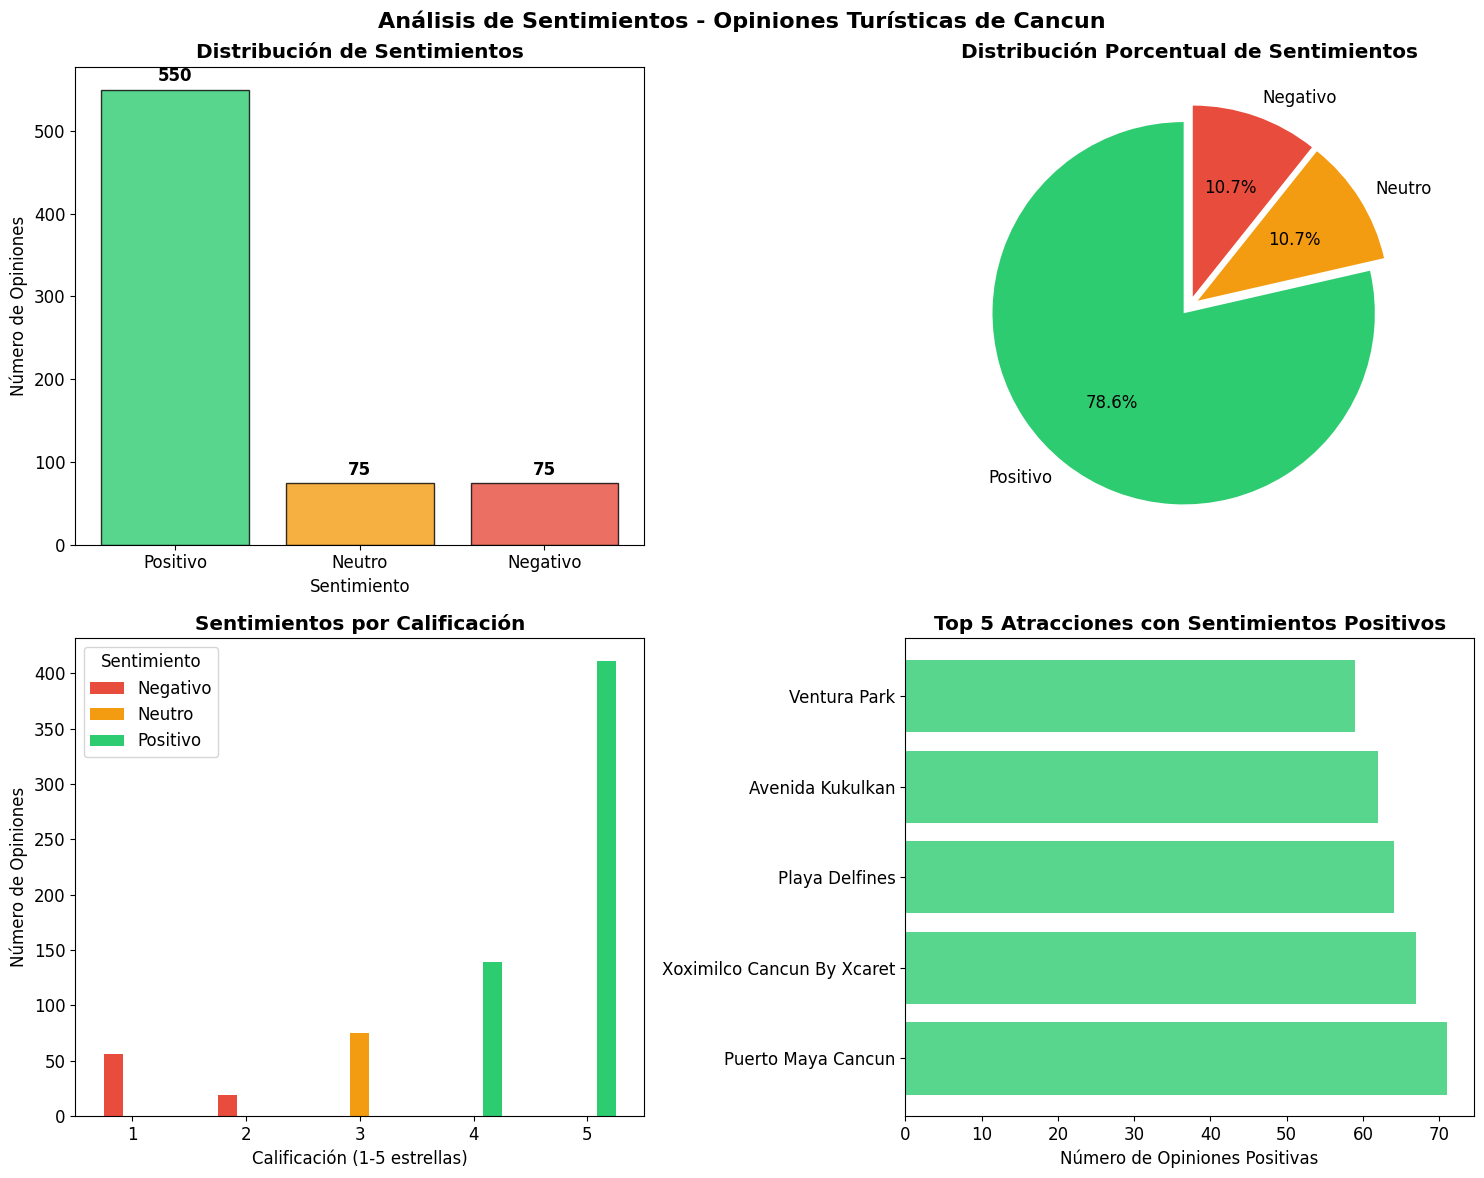

In [6]:
# Crear visualizaciones de los sentimientos
ciudad = df['Ciudad'].iloc[0]
fig = analizador.crear_visualizaciones(df, ciudad)
plt.show()

In [7]:
# Mostrar ejemplos representativos de cada sentimiento
analizador.mostrar_todos_los_ejemplos(df, n_ejemplos=3)

# Generar resumen final
analizador.generar_resumen_final(df)

üìù EJEMPLOS REPRESENTATIVOS DE CADA SENTIMIENTO

üéØ EJEMPLOS DE SENTIMIENTO POSITIVO
------------------------------------------------------------

üìå Ejemplo 1:
   üèõÔ∏è Atracci√≥n: Playa Delfines
   ‚≠ê Calificaci√≥n: 5/5
   üìÖ Fecha: 2023-12-01
   üí¨ Opini√≥n: "Hermosa playa. ¬°Hermosa playa! Muchos lugares para permanecer a la sombra o tomar el sol. Las duchas y ba√±os del lugar est√°n bien mantenidos."
   --------------------------------------------------

üìå Ejemplo 2:
   üèõÔ∏è Atracci√≥n: Acuario Interactivo
   ‚≠ê Calificaci√≥n: 5/5
   üìÖ Fecha: 2024-11-01
   üí¨ Opini√≥n: "Ian y Carlos los mejores anfitriones gracias. Es una experiencia incre√≠ble para familia el lugar muy interactivo y educativo la experiencia con nado con delfines hermosa sobretodo las atenciones y ser..."
   --------------------------------------------------

üìå Ejemplo 3:
   üèõÔ∏è Atracci√≥n: Xoximilco Cancun By Xcaret
   ‚≠ê Calificaci√≥n: 5/5
   üìÖ Fecha: 2025-03-01
   üí¨ Opini√

# An√°lisis de Sentimientos con Modelos Preentrenados de HuggingFace

En esta segunda parte del an√°lisis, utilizaremos modelos preentrenados de HuggingFace para clasificar sentimientos bas√°ndose en el contenido textual de las opiniones, y luego compararemos estos resultados con la clasificaci√≥n basada en calificaciones de estrellas.

## Objetivos de esta secci√≥n:
- Cargar un modelo preentrenado de HuggingFace optimizado para an√°lisis de sentimientos
- Aplicar el modelo al contenido textual de las opiniones (columna `TituloReview`)
- Comparar los resultados obtenidos con la clasificaci√≥n basada en calificaciones
- Identificar concordancias y discordancias entre ambos m√©todos
- Analizar ejemplos donde los m√©todos difieren para entender mejor las diferencias

In [8]:
# Instalar e importar librer√≠as para modelos preentrenados
print("üì¶ Verificando librer√≠as necesarias para HuggingFace...")

try:
    import transformers
    print("‚úÖ Transformers ya est√° instalado")
except ImportError:
    print("‚è≥ Instalando transformers...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "transformers[torch]"])
    print("‚úÖ Transformers instalado exitosamente")

# Importar el analizador de HuggingFace
from analisis_sentimientos import AnalizadorSentimientosHuggingFace

print("‚úÖ Analizador de HuggingFace importado correctamente")

üì¶ Verificando librer√≠as necesarias para HuggingFace...
‚úÖ Transformers ya est√° instalado
‚úÖ Analizador de HuggingFace importado correctamente


In [9]:
# Inicializar el analizador de HuggingFace
print("ü§ñ Inicializando analizador de sentimientos con HuggingFace...")

# Usamos un modelo multiling√ºe optimizado para espa√±ol
# Este modelo funciona bien en hardware limitado (16GB RAM, 6 cores)
analizador_hf = AnalizadorSentimientosHuggingFace(
    modelo_nombre="nlptown/bert-base-multilingual-uncased-sentiment"
)

# Cargar el modelo
exito = analizador_hf.cargar_modelo()

if exito:
    print("üéØ Modelo recomendado para este hardware:")
    print("   ‚Ä¢ Modelo: bert-base-multilingual-uncased-sentiment")
    print("   ‚Ä¢ Tama√±o: ~400MB aproximadamente")
    print("   ‚Ä¢ Soporte: Multiling√ºe (incluye espa√±ol)")
    print("   ‚Ä¢ Optimizado para: An√°lisis de sentimientos en rese√±as")
else:
    print("‚ùå No se pudo cargar el modelo de HuggingFace")

ü§ñ Inicializando analizador de sentimientos con HuggingFace...
ü§ñ Cargando modelo: nlptown/bert-base-multilingual-uncased-sentiment
‚è≥ Esto puede tomar unos momentos la primera vez...


Device set to use cpu


‚úÖ Modelo cargado exitosamente
üåç Modelo: nlptown/bert-base-multilingual-uncased-sentiment
üéØ Modelo recomendado para este hardware:
   ‚Ä¢ Modelo: bert-base-multilingual-uncased-sentiment
   ‚Ä¢ Tama√±o: ~400MB aproximadamente
   ‚Ä¢ Soporte: Multiling√ºe (incluye espa√±ol)
   ‚Ä¢ Optimizado para: An√°lisis de sentimientos en rese√±as


In [10]:
# Aplicar an√°lisis de sentimientos con HuggingFace al dataset completo
print("üöÄ Iniciando an√°lisis de sentimientos con modelo preentrenado...")
print("‚ö†Ô∏è  NOTA: Este proceso puede tomar 5-10 minutos dependiendo del hardware")

# Procesar el dataset completo
df_con_hf = analizador_hf.procesar_dataset_completo(df, 'TituloReview')

print(f"\n‚úÖ An√°lisis con HuggingFace completado")
print(f"üìä Dataset ahora contiene {len(df_con_hf.columns)} columnas:")
print(f"   ‚Ä¢ Sentimiento (por calificaci√≥n)")
print(f"   ‚Ä¢ SentimientoHF (por modelo preentrenado)")

# Mostrar una muestra comparativa
print("\n" + "="*80)
print("MUESTRA COMPARATIVA DE AMBOS M√âTODOS")
print("="*80)
display(df_con_hf[['TituloReview', 'Calificacion', 'Sentimiento', 'SentimientoHF']].head(10))

üöÄ Iniciando an√°lisis de sentimientos con modelo preentrenado...
‚ö†Ô∏è  NOTA: Este proceso puede tomar 5-10 minutos dependiendo del hardware
üîÑ Procesando sentimientos con HuggingFace para 700 registros...
‚è≥ Esto puede tomar varios minutos...
   Procesando registro 1/700 (0.1%)
   Procesando registro 26/700 (3.7%)
   Procesando registro 51/700 (7.3%)
   Procesando registro 76/700 (10.9%)
   Procesando registro 101/700 (14.4%)
   Procesando registro 126/700 (18.0%)
   Procesando registro 151/700 (21.6%)
   Procesando registro 176/700 (25.1%)
   Procesando registro 201/700 (28.7%)
   Procesando registro 226/700 (32.3%)
   Procesando registro 251/700 (35.9%)
   Procesando registro 276/700 (39.4%)
   Procesando registro 301/700 (43.0%)
   Procesando registro 326/700 (46.6%)
   Procesando registro 351/700 (50.1%)
   Procesando registro 376/700 (53.7%)
   Procesando registro 401/700 (57.3%)
   Procesando registro 426/700 (60.9%)
   Procesando registro 451/700 (64.4%)
   Procesando re

TituloReview  Calificacion  \
0  Promiedo la verdad no para volver. El museo la...             3   
1  Identidad, Cultura y Patrimonio. El Museo Maya...             5   
2  Decepcionada del lugar que deber√≠a ser un refe...             1   
3  ¬°Recomiendo!. Realmente encantador museo muy b...             4   
4  ¬°Ciudad Iguana!. ¬°El museo fue un descanso muy...             4   
5  Canc√∫n-Museo de Maya y San Miguelito. El relat...             4   
6  Vale la pena una visita. Un museo muy educativ...             5   
7  Musuem maya. Incre√≠ble museo para aprender cul...             5   
8  Gran actividad barata y f√°cil de hacer despu√©s...             5   
9  Gran museo y zona arqueol√≥gica incre√≠ble. Pasa...             5   

  Sentimiento SentimientoHF  
0      Neutro      Negativo  
1    Positivo      Positivo  
2    Negativo      Negativo  
3    Positivo      Positivo  
4    Positivo      Positivo  
5    Positivo      Positivo  
6    Positivo      Positivo  
7    Positivo      Positivo  
8    Positivo      Positivo  
9    Positivo      Positivo

In [11]:
# Comparar los resultados de ambos m√©todos
print("üîç COMPARACI√ìN ENTRE M√âTODOS DE AN√ÅLISIS")
print("="*60)

# Realizar comparaci√≥n estad√≠stica
comparacion = analizador_hf.comparar_sentimientos(df_con_hf)

# Mostrar estad√≠sticas de comparaci√≥n
analizador_hf.mostrar_comparacion(comparacion)

# Mostrar la tabla de confusi√≥n detallada
print("\nüìä TABLA DE CONFUSI√ìN DETALLADA:")
print("-" * 50)
display(comparacion['tabla_confusion'])

üîç COMPARACI√ìN ENTRE M√âTODOS DE AN√ÅLISIS
üìä COMPARACI√ìN DE M√âTODOS DE AN√ÅLISIS DE SENTIMIENTOS
üéØ CONCORDANCIA GENERAL:
   ‚Ä¢ Total de registros: 700
   ‚Ä¢ Registros concordantes: 618
   ‚Ä¢ Porcentaje de concordancia: 88.3%

üìã ESTAD√çSTICAS POR SENTIMIENTO:
--------------------------------------------------

Positivo:
   üìä Por calificaci√≥n: 550 registros
   ü§ñ Por HuggingFace: 539 registros
   ‚úÖ Concordancia: 516 registros (93.8%)

Neutro:
   üìä Por calificaci√≥n: 75 registros
   ü§ñ Por HuggingFace: 54 registros
   ‚úÖ Concordancia: 29 registros (38.7%)

Negativo:
   üìä Por calificaci√≥n: 75 registros
   ü§ñ Por HuggingFace: 107 registros
   ‚úÖ Concordancia: 73 registros (97.3%)

üìä TABLA DE CONFUSI√ìN DETALLADA:
--------------------------------------------------


HuggingFace   Negativo  Neutro  Positivo  All
Calificaci√≥n                                 
Negativo            73       1         1   75
Neutro              24      29        22   75
Positivo            10      24       516  550
All                107      54       539  700

üìà VISUALIZACIONES DE COMPARACI√ìN


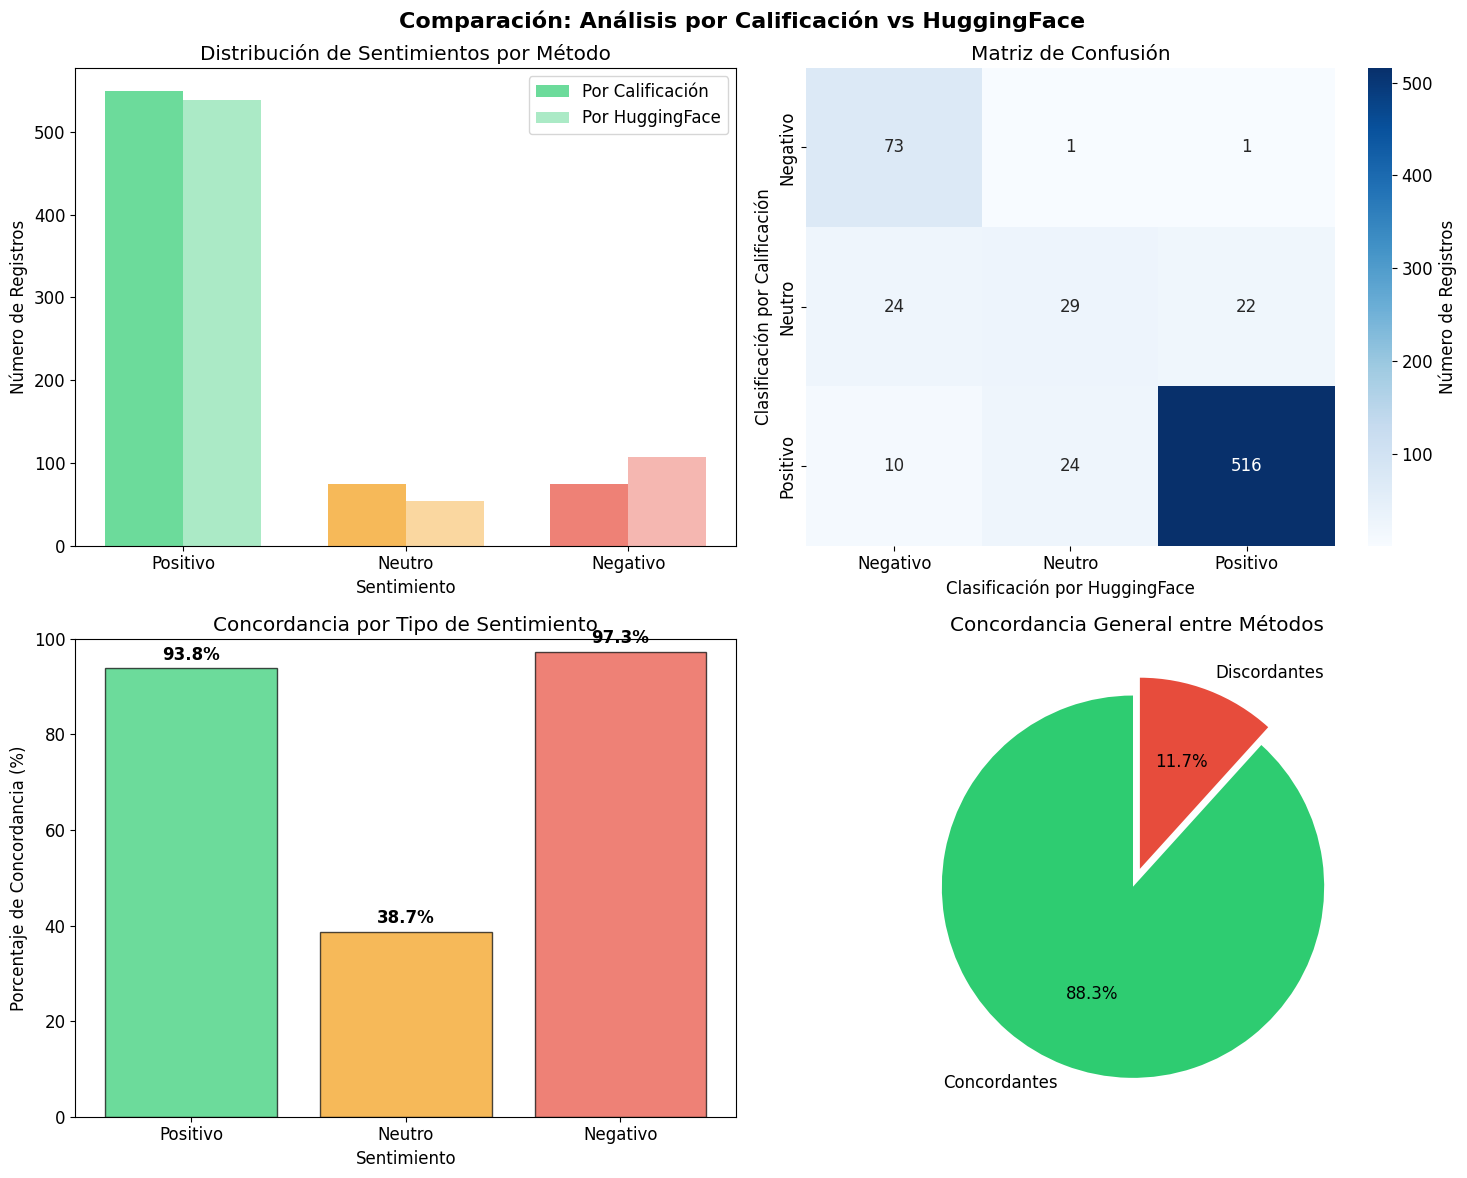

‚úÖ Visualizaciones de comparaci√≥n generadas exitosamente


In [12]:
# Crear visualizaciones de comparaci√≥n entre ambos m√©todos
print("üìà VISUALIZACIONES DE COMPARACI√ìN")
print("="*50)

# Crear las visualizaciones
fig_comparacion = analizador_hf.crear_visualizacion_comparacion(df_con_hf, comparacion)
plt.show()

print("‚úÖ Visualizaciones de comparaci√≥n generadas exitosamente")

In [13]:
# Mostrar ejemplos donde los m√©todos difieren
print("üîç AN√ÅLISIS DE DISCORDANCIAS ENTRE M√âTODOS")
print("="*70)

# Mostrar algunos ejemplos de discordancias (muestra limitada)
analizador_hf.mostrar_ejemplos_discordantes(df_con_hf, n_ejemplos=3)

print("\n" + "üîÑ" * 25 + " AN√ÅLISIS COMPLETO " + "üîÑ" * 25)

# üìã NUEVA FUNCIONALIDAD: Mostrar TODAS las discordancias completas
# Esta funci√≥n muestra el texto completo de todas las opiniones discordantes
print("\nüÜï Para ver TODAS las opiniones discordantes completas:")
discordantes_completas = analizador_hf.mostrar_todas_discordancias(df_con_hf)

print("\n" + "="*70)
print("üìä RESUMEN FINAL DE LA COMPARACI√ìN")
print("="*70)
print(f"‚úÖ An√°lisis completado para {len(df_con_hf)} opiniones")
print(f"üèôÔ∏è Ciudad analizada: {df_con_hf['Ciudad'].iloc[0]}")
print(f"üéØ Atracciones √∫nicas: {df_con_hf['Atraccion'].nunique()}")
print(f"\nüìà M√©todos comparados:")
print(f"   ‚Ä¢ Clasificaci√≥n por calificaci√≥n (1-5 estrellas)")
print(f"   ‚Ä¢ Clasificaci√≥n por modelo preentrenado (HuggingFace)")
print(f"\nüîç Concordancia entre m√©todos: {comparacion['porcentaje_concordancia']:.1f}%")
print(f"üìä Casos discordantes: {len(df_con_hf) - comparacion['concordancia_total']} de {len(df_con_hf)}")

print(f"\nüí° EXTRA: Se han mostrado {len(discordantes_completas)} opiniones discordantes completas arriba")
print("üìã Cada opini√≥n se muestra sin cortes para an√°lisis detallado")

üîç AN√ÅLISIS DE DISCORDANCIAS ENTRE M√âTODOS
üîç EJEMPLOS DE DISCORDANCIAS ENTRE M√âTODOS
üìä Total de discordancias: 82/700 (11.7%)

üéØ Negativo (Calificaci√≥n) ‚Üí Neutro (HuggingFace): 1 casos
------------------------------------------------------------

üìå Ejemplo 1:
   üèõÔ∏è Atracci√≥n: La Isla
   ‚≠ê Calificaci√≥n: 1/5 ‚Üí Negativo
   ü§ñ HuggingFace: Neutro
   üí¨ Opini√≥n: "Oaps outing. Sobreprecio, no vale la pena el uber all√≠ @ taxi de vueltaSin embargo, buen bar / comedor con vistas al agua - addidas, stechhers, tienda libre de impuestos todo peque√±o y desprovisto."
   --------------------------------------------------

üéØ Negativo (Calificaci√≥n) ‚Üí Positivo (HuggingFace): 1 casos
------------------------------------------------------------

üìå Ejemplo 1:
   üèõÔ∏è Atracci√≥n: La Isla
   ‚≠ê Calificaci√≥n: 1/5 ‚Üí Negativo
   ü§ñ HuggingFace: Positivo
   üí¨ Opini√≥n: "No te molestes. No te molestes. Las mismas tiendas que puedes encontrar en cualquier